# N2V Training

Here we train N2V on single noisy images. This allows us to create a pseudo-ground truth, which further allows estimation of the noise model in the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```. Use this (```1_N2VTraining.ipynb```) and ```2_N2VPrediction.ipynb``` if you wish to test the Bootstrap Mode or in case the calibration data is not available.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../../')
import unet.model
from unet.model import UNet

from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from https://zenodo.org/record/5156913/files/Convallaria_diaphragm.zip?download=1. Here we show the pipeline for Convallaria dataset. Save the dataset in an appropriate path. For us, the path is the data folder which exists at `../../../`. For Convallaria, the data to be denoised is named ```20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif```. 

In [2]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data'):
    os.mkdir('../../../data')

zipPath="../../../data/Convallaria_diaphragm.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve('https://zenodo.org/record/5156913/files/Convallaria_diaphragm.zip?download=1', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data")


### Load Data
#### Check ```filename``` and specify the ```dataname```  

In [3]:
path='../../../data/Convallaria_diaphragm/'
fileName='20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif'
dataName='convallaria' # This will be used to name the noise2void model

Run the cells below

In [4]:
data=imread(path+fileName)
nameModel=dataName+'_n2v'

### Create the Network and Train it
This can take a while.
`numOfEpochs=200` and `stepsPerEpoch=10` gives best results for `Convallaria` dataset.

In [5]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix= nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch = 10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

Epoch 0 finished      
avg. loss: 0.19376018196344375+-(2SEM)0.05687192817461602      
Epoch 1 finished      
avg. loss: 0.1803057575598359+-(2SEM)0.049321285732379795      
Epoch 2 finished      
avg. loss: 0.12904436886310577+-(2SEM)0.03439235569530141      
Epoch 3 finished      
avg. loss: 0.1751984918490052+-(2SEM)0.055519705757754126      
Epoch 4 finished      
avg. loss: 0.14860511645674707+-(2SEM)0.046423547893312565      
Epoch 5 finished      
avg. loss: 0.13467635847628118+-(2SEM)0.04350293574910301      
Epoch 6 finished      
avg. loss: 0.09619818832725287+-(2SEM)0.033211447494558975      
Epoch 7 finished      
avg. loss: 0.12150852959603071+-(2SEM)0.029170660845009574      
Epoch 8 finished      
avg. loss: 0.108114776853472+-(2SEM)0.030033304214061512      
Epoch 9 finished      
avg. loss: 0.10612837951630354+-(2SEM)0.022148525427067023      
Epoch 10 finished      
avg. loss: 0.1219353599473834+-(2SEM)0.033653421627629417      
Epoch 11 finished      
avg. loss: 0.13

avg. loss: 0.1129170659929514+-(2SEM)0.02916768615864845      
Epoch 91 finished      
avg. loss: 0.09281880035996437+-(2SEM)0.014193152926845077      
Epoch 92 finished      
avg. loss: 0.10958281662315131+-(2SEM)0.02746278720313324      
Epoch 93 finished      
avg. loss: 0.11696729622781277+-(2SEM)0.031933092286363776      
Epoch 94 finished      
avg. loss: 0.10673898588865996+-(2SEM)0.02529969339356263      
Epoch 95 finished      
avg. loss: 0.0895001390017569+-(2SEM)0.018537958347237916      
Epoch 96 finished      
avg. loss: 0.12630110904574393+-(2SEM)0.0398250526664      
Epoch    96: reducing learning rate of group 0 to 3.1250e-05.
Epoch 97 finished      
avg. loss: 0.09725773921236396+-(2SEM)0.032366861321110205      
Epoch 98 finished      
avg. loss: 0.10636477693915367+-(2SEM)0.020072089500862422      
Epoch 99 finished      
avg. loss: 0.13494096957147123+-(2SEM)0.028441860366780383      
Epoch 100 finished      
avg. loss: 0.10058469660580158+-(2SEM)0.02293821254775156

Epoch 178 finished      
avg. loss: 0.10450079496949911+-(2SEM)0.02091089180408447      
Epoch 179 finished      
avg. loss: 0.11992574632167816+-(2SEM)0.030328681794976654      
Epoch 180 finished      
avg. loss: 0.1024672619998455+-(2SEM)0.028544072863255603      
Epoch 181 finished      
avg. loss: 0.1133469907566905+-(2SEM)0.028912776275374943      
Epoch 182 finished      
avg. loss: 0.11509156823158265+-(2SEM)0.03189782222950177      
Epoch 183 finished      
avg. loss: 0.11464243121445179+-(2SEM)0.02387244662604622      
Epoch 184 finished      
avg. loss: 0.12191110085695982+-(2SEM)0.029291432902209674      
Epoch 185 finished      
avg. loss: 0.09534852970391512+-(2SEM)0.013413256665726887      
Epoch 186 finished      
avg. loss: 0.10136921852827072+-(2SEM)0.016163189608312006      
Epoch 187 finished      
avg. loss: 0.1009645102545619+-(2SEM)0.03229506532114013      
Epoch 188 finished      
avg. loss: 0.10544057656079531+-(2SEM)0.025738377477201653      
Epoch 189 finishe

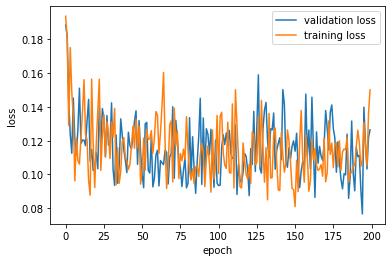

In [7]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()